## 扔骰子

In [1]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [7]:
fair_probs = torch.ones([6]) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [11]:
# 按照指定的概率，在多项式分布中采样一次
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [13]:
# 按照指定的概率，在多项式分布中采样多次
multinomial.Multinomial(1000, fair_probs).sample()

tensor([170., 187., 146., 178., 163., 156.])

In [14]:
# 计算采样得到的概率
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1730, 0.1690, 0.1530, 0.1700, 0.1720, 0.1630])

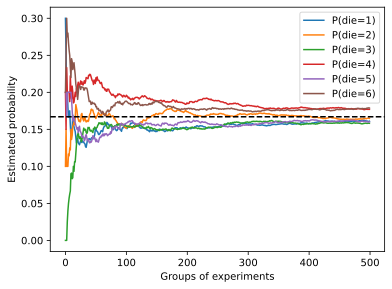

In [32]:
# 做500组实验，每组实验抽10个样本，并将结果可视化
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()